In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [4]:
dataX=pd.read_csv('data/datasetLSTMX.csv', engine='python')
dataX.head()

,20201,1212000,0.000645609
0,19521,1171200,0.000659
1,19245,1154640,0.000738
2,20202,1212060,0.000662
3,20202,1212060,0.000671
4,20661,1239600,0.000738


In [5]:
dataX.head

<bound method NDFrame.head of       20201  1212000  0.000645609
0     19521  1171200     0.000659
1     19245  1154640     0.000738
2     20202  1212060     0.000662
3     20202  1212060     0.000671
4     20661  1239600     0.000738
...     ...      ...          ...
1994      1       84     1.000000
1995      1       84     1.000000
1996      1       84     1.000000
1997      1       84     1.000000
1998      1       84     1.000000

[1999 rows x 3 columns]>

In [6]:
dataY=pd.read_csv('data/datasetLSTMY1.csv', engine='python')
dataY.shape

(413, 1)

In [7]:
for i in range(215,1000,1):
    dataY.at[i]=0
for i in range(1000,1999,1):
    dataY.at[i]=1

In [8]:
dataY.head

<bound method NDFrame.head of         0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1994  1.0
1995  1.0
1996  1.0
1997  1.0
1998  1.0

[1999 rows x 1 columns]>

In [9]:
frames=[dataX,dataY]
data=pd.concat(frames, axis=1)
data.head()

,20201,1212000,0.000645609,0
0,19521,1171200,0.000659,0.0
1,19245,1154640,0.000738,0.0
2,20202,1212060,0.000662,0.0
3,20202,1212060,0.000671,0.0
4,20661,1239600,0.000738,0.0


In [10]:
data.shape

(1999, 4)

In [11]:
#Get all of the rows from the first three columns of the dataset
X = data.values[:,0:3]
#X = np.asarray(X).astype('int')
# Get all of the rows from the last column
y = data.values[:,3]

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
#Transform dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state = 4)
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [14]:
#Model
model = Sequential([
    Dense(12, activation='relu', input_dim=3),
    Dense(15, activation='relu'),
    Dense(18, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [15]:
#training model
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.2502 - val_loss: 0.2400 - val_accuracy: 1.0000
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2253 - accuracy: 0.9993 - val_loss: 0.2077 - val_accuracy: 1.0000
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9993 - val_loss: 0.1709 - val_accuracy: 1.0000
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9993 - val_loss: 0.1265 - val_accuracy: 1.0000
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9993 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9993 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9993 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 57/100
26/26 [==============================] - 0s 1ms/step - loss: 7.5775e-04 - accuracy: 0.9993 - val_loss: 7.3462e-05 - val_accuracy: 1.0000
Epoch 58/100
26/26 [==============================] - 0s 1ms/step - loss: 7.5497e-04 - accuracy: 0.9993 - val_loss: 7.0706e-05 - val_accuracy: 1.0000
Epoch 59/100
26/26 [==============================] - 0s 1ms/step - loss: 7.5243e-04 - accuracy: 0.9993 - val_loss: 6.8052e-05 - val_accuracy: 1.0000
Epoch 60/100
26/26 [==============================] - 0s 1ms/step - loss: 7.5005e-04 - accuracy: 0.9993 - val_loss: 6.5453e-05 - val_accuracy: 1.0000
Epoch 61/100
26/26 [==============================] - 0s 1ms/step - loss: 7.4771e-04 - accuracy: 0.9993 - val_loss: 6.3153e-05 - val_accuracy: 1.0000
Epoch 62/100
26/26 [==============================] - 0s 1ms/step - loss: 7.4561e-04 - accuracy: 0.9993 - val_loss: 6.0840e-05 - val_accuracy: 1.0000
Epoch 63/100
26/26 [==============================] - 0s 1ms/step - loss: 7.4355e-04 - accuracy: 0.9

In [42]:
model.save("models/model_flow.h5")

Text(0.5, 51.0, 'Predicted')

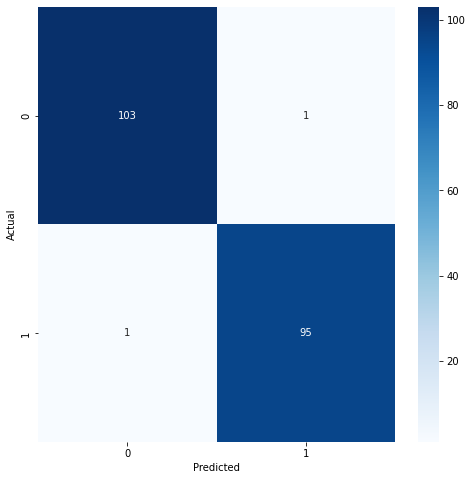

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred=(model.predict(X_test)>0.8).astype("int32")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [19]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(y_test,y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       104
         1.0       0.99      0.99      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

